In [1]:
!pip install tensorflow

In [2]:
!pip install pydot-ng

In [3]:
!pip install graphviz

In [4]:
!pip install pydotplus

In [5]:
import pydot
import graphviz
import pydotplus

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [7]:
import tensorflow
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [8]:
input_img = Input(shape=(48,48,1))

#Ist layer
layer_1 = Conv2D(10,(1,1),activation='relu',padding='same')(input_img)
layer_1 = Conv2D(10,(3,3),activation='relu',padding='same')(layer_1)

layer_2 = Conv2D(10,(1,1),activation='relu',padding='same')(input_img)
layer_2 = Conv2D(10,(5,5),activation='relu',padding='same')(layer_2)

layer_3 = MaxPooling2D((3,3),strides=(1,1),padding='same')(input_img)
layer_3 = Conv2D(10,(1,1),activation='relu',padding='same')(layer_3)

mid_1 = tensorflow.keras.layers.concatenate([layer_1,layer_2,layer_3],axis=3)

In [9]:
flat_1 = Flatten()(mid_1)

dense_1= Dense(1200,activation='relu')(flat_1)
dense_2= Dense(600,activation='relu')(dense_1)
dense_3= Dense(150,activation='relu')(dense_2)
output= Dense(10,activation='softmax')(dense_3)

In [10]:
model = Model([input_img],output)

In [12]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

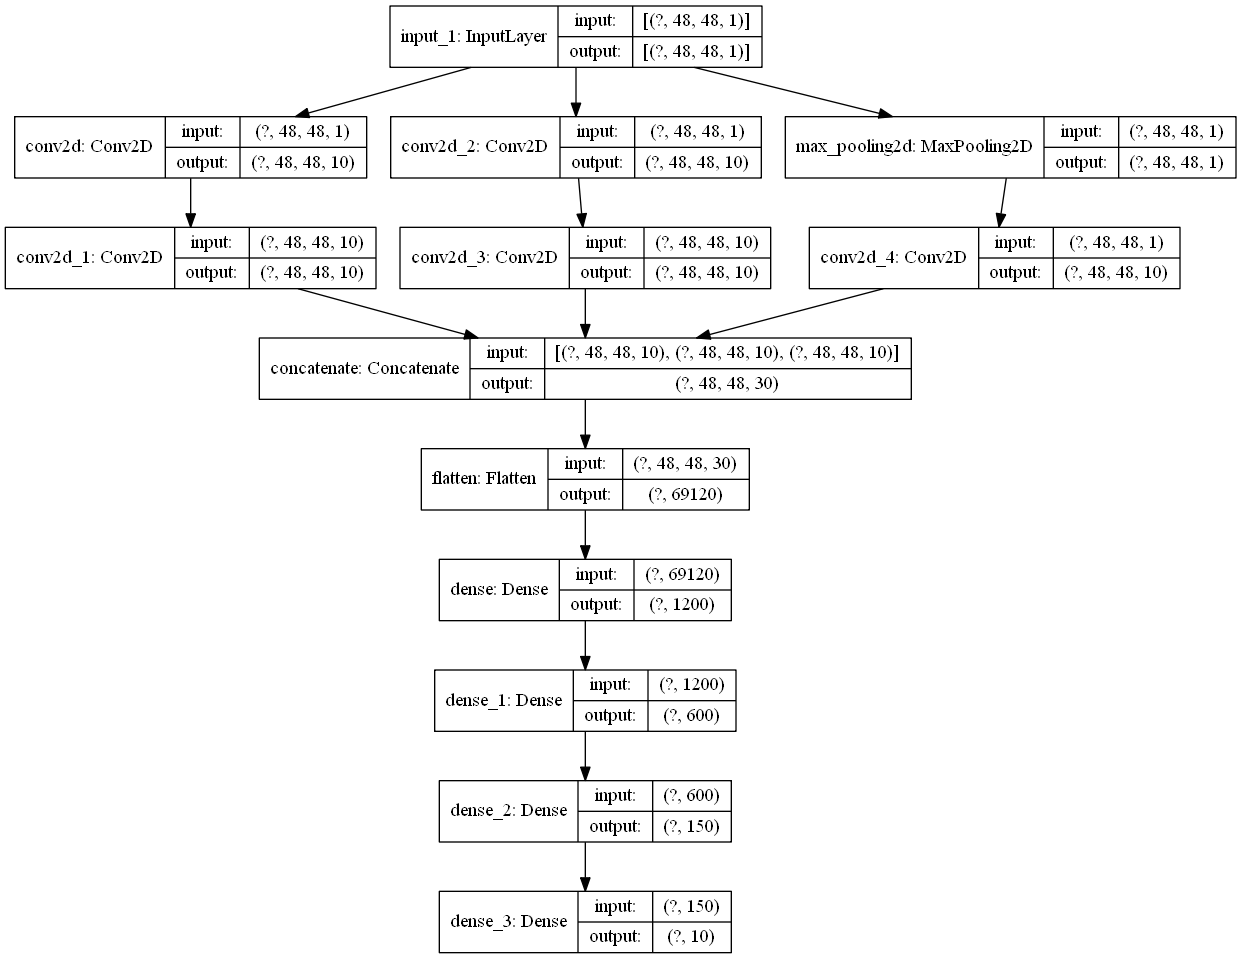

In [13]:
plot_model(model,to_file='model.png', show_shapes=True, show_layer_names=True)